In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("Energy_consumption.csv")

In [6]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [7]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [8]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [9]:
df.shape

(1000, 11)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


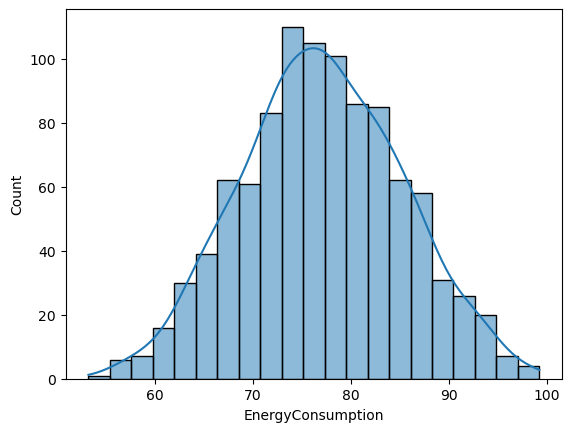

In [12]:
sns.histplot(df['EnergyConsumption'], kde=True)
plt.show()

In [13]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

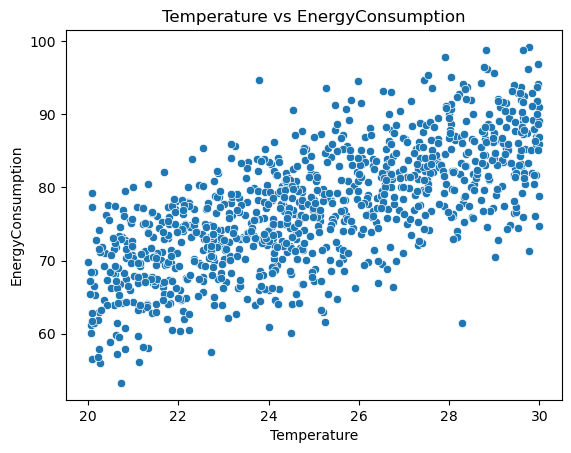

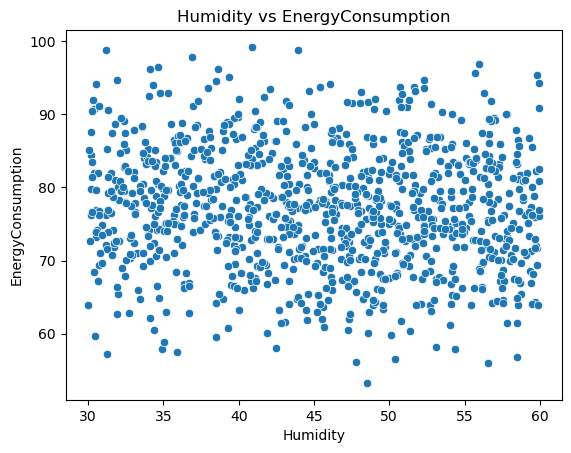

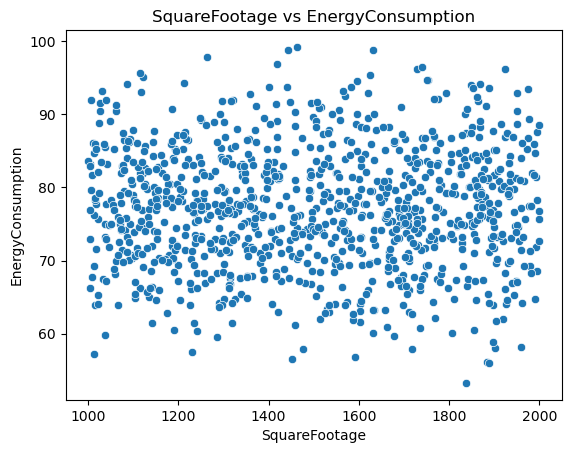

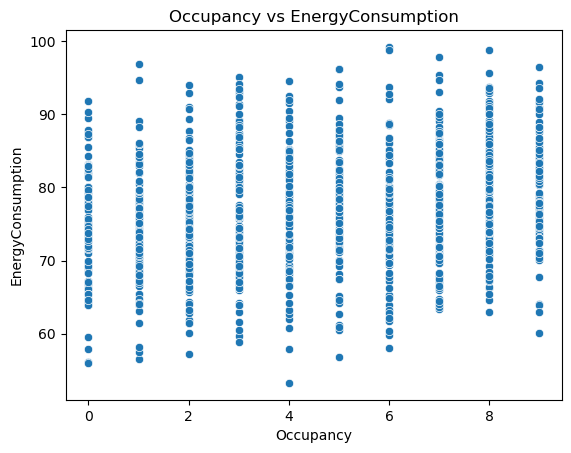

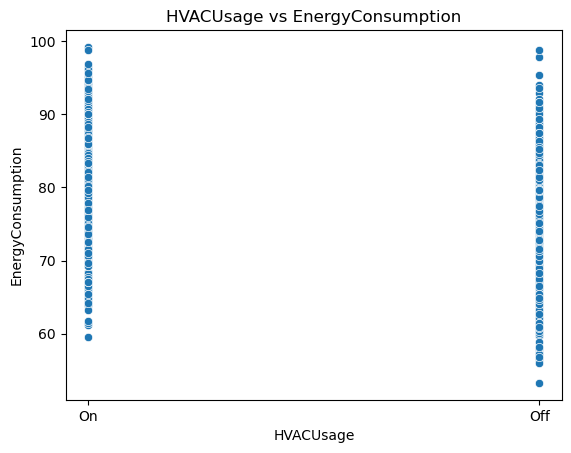

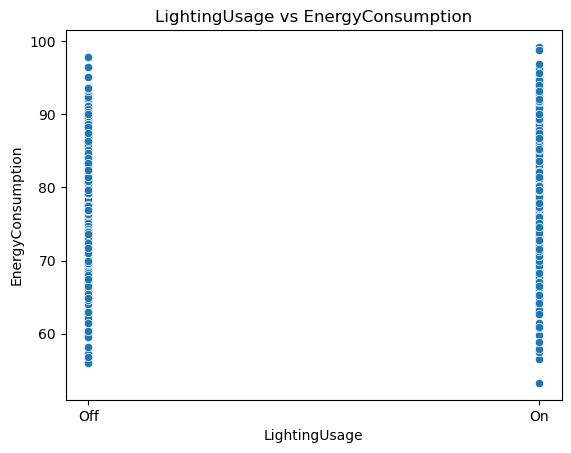

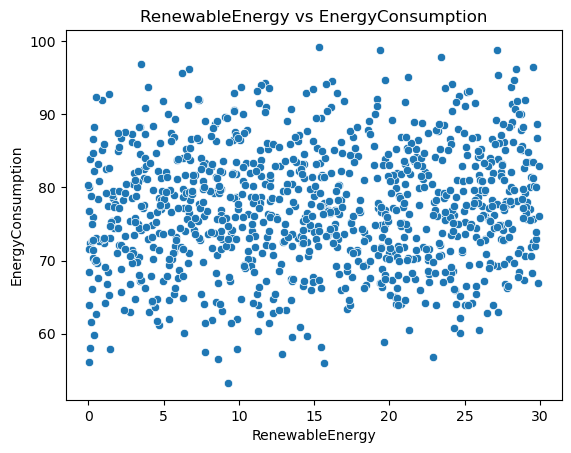

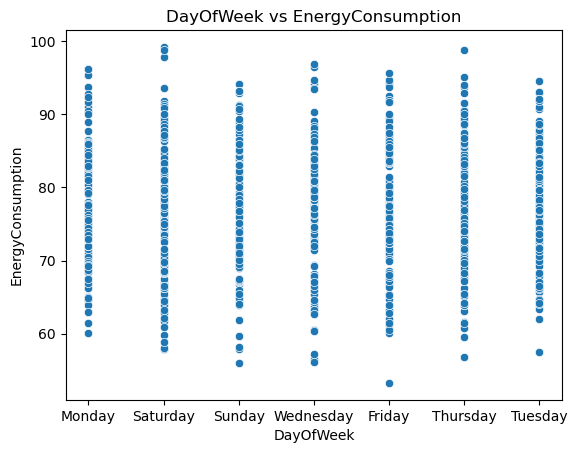

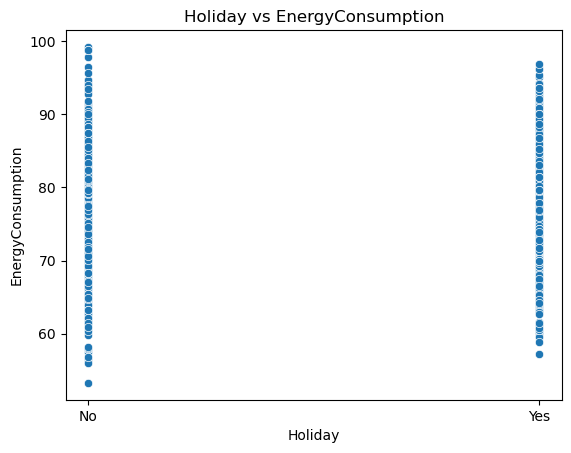

In [14]:
continuous_features = ['Temperature', 'Humidity', 'SquareFootage', 
                       'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy','DayOfWeek', 'Holiday']

for col in continuous_features:
    sns.scatterplot(x=df[col], y=df['EnergyConsumption'])
    plt.title(f"{col} vs EnergyConsumption")
    plt.show()


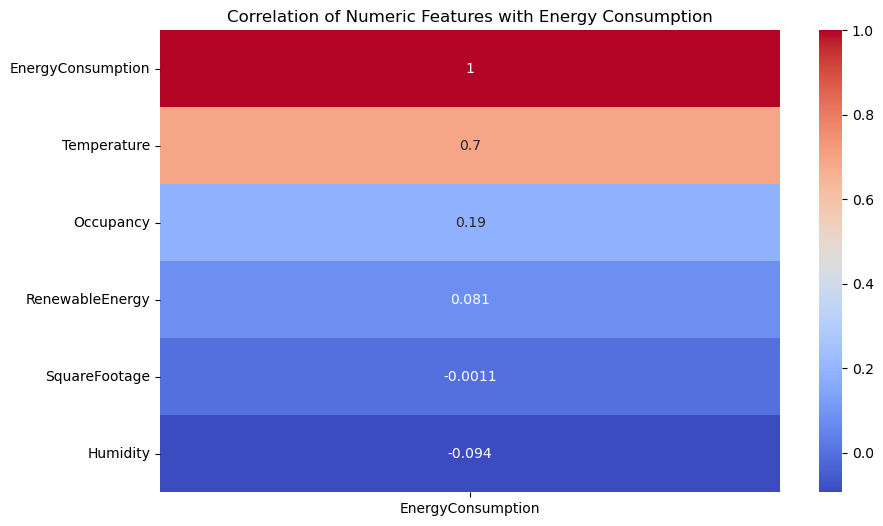

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot correlation with EnergyConsumption
plt.figure(figsize=(10,6))
sns.heatmap(corr[['EnergyConsumption']].sort_values(by='EnergyConsumption', ascending=False),
            annot=True, cmap="coolwarm")
plt.title("Correlation of Numeric Features with Energy Consumption")
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Copy dataframe
df_corr = df.copy()

# 1️⃣ Encode categorical features
df_corr['Holiday'] = df_corr['Holiday'].map({'Yes':1, 'No':0})
df_corr['DayOfWeek'] = df_corr['DayOfWeek'].map({
    'Mon':0, 'Tue':1, 'Wed':2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6
})

# 2️⃣ Convert Timestamp to numeric features
df_corr['Hour'] = pd.to_datetime(df_corr['Timestamp']).dt.hour
df_corr['Month'] = pd.to_datetime(df_corr['Timestamp']).dt.month
df_corr['Day'] = pd.to_datetime(df_corr['Timestamp']).dt.day

# Drop original Timestamp
df_corr = df_corr.drop(columns=['Timestamp'])


In [17]:
import pandas as pd

# Select only numeric columns (int or float)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Check which columns are numeric
print(numeric_df.columns)




Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')


In [18]:
# Compute correlation between numeric columns
corr_matrix = numeric_df.corr()

# Display correlation matrix
print(corr_matrix)


                   Temperature  Humidity  SquareFootage  Occupancy  \
Temperature           1.000000 -0.034032       0.004551  -0.003490   
Humidity             -0.034032  1.000000      -0.014651   0.004766   
SquareFootage         0.004551 -0.014651       1.000000   0.009696   
Occupancy            -0.003490  0.004766       0.009696   1.000000   
RenewableEnergy      -0.001350  0.002052       0.022196   0.013680   
EnergyConsumption     0.696410 -0.093583      -0.001129   0.186580   

                   RenewableEnergy  EnergyConsumption  
Temperature              -0.001350           0.696410  
Humidity                  0.002052          -0.093583  
SquareFootage             0.022196          -0.001129  
Occupancy                 0.013680           0.186580  
RenewableEnergy           1.000000           0.081160  
EnergyConsumption         0.081160           1.000000  


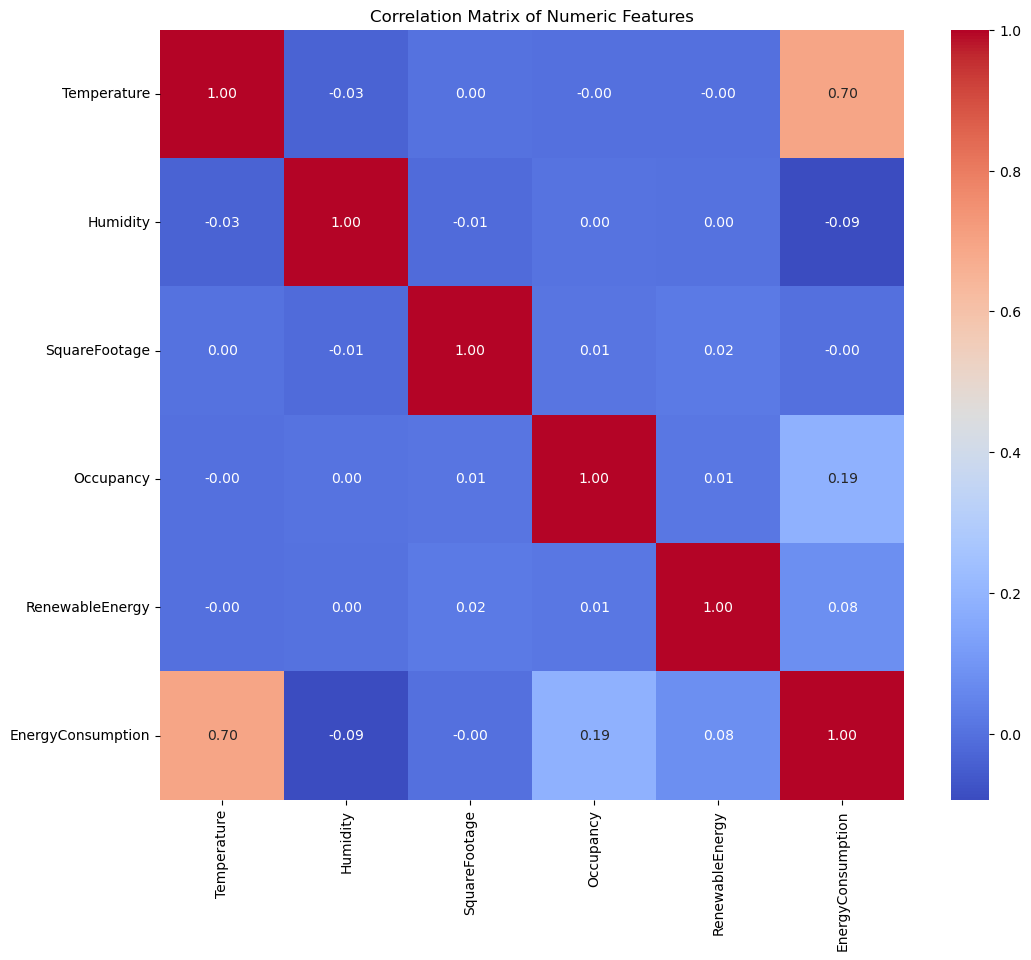

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


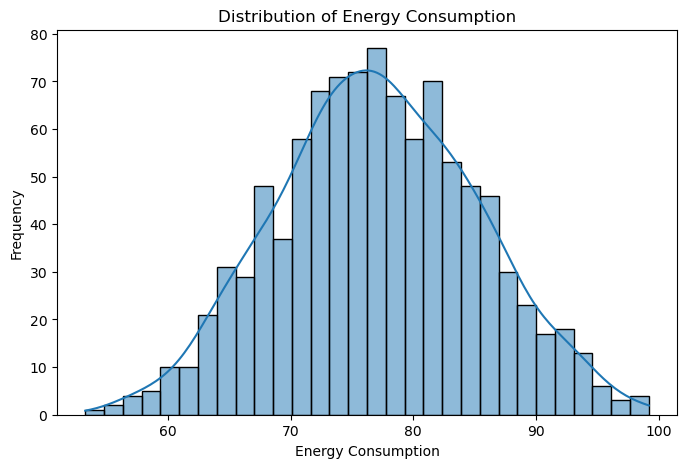

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['EnergyConsumption'], bins=30, kde=True)
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


In [21]:
skewness = df['EnergyConsumption'].skew()
print("Skewness of EnergyConsumption:", skewness)


Skewness of EnergyConsumption: 0.027398907453860765


In [22]:

df['Holiday'] = df['Holiday'].map({'Yes':1, 'No':0})
df['DayOfWeek'] = df['DayOfWeek'].map({
    'Mon':0, 'Tue':1, 'Wed':2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6
})

In [23]:
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month
df['Day'] = pd.to_datetime(df['Timestamp']).dt.day
df = df.drop(columns=['Timestamp'])  # drop original Timestamp

In [24]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Month,Day
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,NaN,0,75.364373,0,1,1
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,NaN,0,83.401855,1,1,1
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,NaN,0,78.270888,2,1,1
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,NaN,0,56.519850,3,1,1
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,NaN,0,70.811732,4,1,1


In [25]:
df.dtypes

Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek            float64
Holiday                int64
EnergyConsumption    float64
Hour                   int32
Month                  int32
Day                    int32
dtype: object

In [26]:
# Mapping dictionary
binary_mapping = {'On': 1, 'Off': 0}

# Columns to convert
binary_cols = ['HVACUsage', 'LightingUsage']

# Apply mapping
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

# Optional: Fill NaN if any unexpected values exist
df[binary_cols] = df[binary_cols].fillna(0)

# Check dtypes after conversion
print(df.dtypes)
print(df[binary_cols].head())


Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage              int64
LightingUsage          int64
RenewableEnergy      float64
DayOfWeek            float64
Holiday                int64
EnergyConsumption    float64
Hour                   int32
Month                  int32
Day                    int32
dtype: object
   HVACUsage  LightingUsage
0          1              0
1          1              1
2          0              0
3          0              1
4          1              0


In [27]:
df.shape

(1000, 13)

In [28]:
df = df.drop(columns=['Holiday', 'DayOfWeek'], errors='ignore')  # ignore if missing

# ------------------------
# 7️⃣ Split Features and Target
# ------------------------
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']


In [29]:
from sklearn.model_selection import train_test_split

# First, split 80% train_val and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Then split train_val into 75% train and 25% validation → 0.75 * 0.8 = 0.6 total train
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# ------------------------
# 4️⃣ Optional: Check shapes
# ------------------------
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

X_train: (600, 10)
X_val: (200, 10)
X_test: (200, 10)
y_train: (600,)
y_val: (200,)
y_test: (200,)


In [30]:
# Returns total number of NaNs in the entire DataFrame
print("Total NaNs in DataFrame:", df.isnull().sum().sum())


Total NaNs in DataFrame: 0


In [31]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy'],
      dtype='object')


# ------------------------
# 7️⃣ Scale/Normalize Numeric Features (if required)
# ------------------------

In [32]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

# Fit scaler on training data and transform
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform validation and test data using the same scaler
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])





#Define Models 

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"{name} → RMSE: {rmse:.2f}, R2: {r2:.2f}")


# ------------------------
# 11️⃣ Evaluate on Test Set and Update results
# ------------------------
print("\n--- Test Set Evaluation ---")
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    # Update results with test metrics
    results[name]["Test_RMSE"] = rmse_test
    results[name]["Test_R2"] = r2_test

    print(f"{name} → Test RMSE: {rmse_test:.2f}, Test R2: {r2_test:.2f}")



Linear Regression → RMSE: 5.28, R2: 0.54
Ridge Regression → RMSE: 5.28, R2: 0.54
Lasso Regression → RMSE: 5.27, R2: 0.54
Decision Tree → RMSE: 5.96, R2: 0.41
Random Forest → RMSE: 5.53, R2: 0.49
Gradient Boosting → RMSE: 5.73, R2: 0.46

--- Test Set Evaluation ---
Linear Regression → Test RMSE: 5.19, Test R2: 0.59
Ridge Regression → Test RMSE: 5.19, Test R2: 0.59
Lasso Regression → Test RMSE: 5.19, Test R2: 0.59
Decision Tree → Test RMSE: 5.72, Test R2: 0.50
Random Forest → Test RMSE: 5.40, Test R2: 0.56
Gradient Boosting → Test RMSE: 5.57, Test R2: 0.53


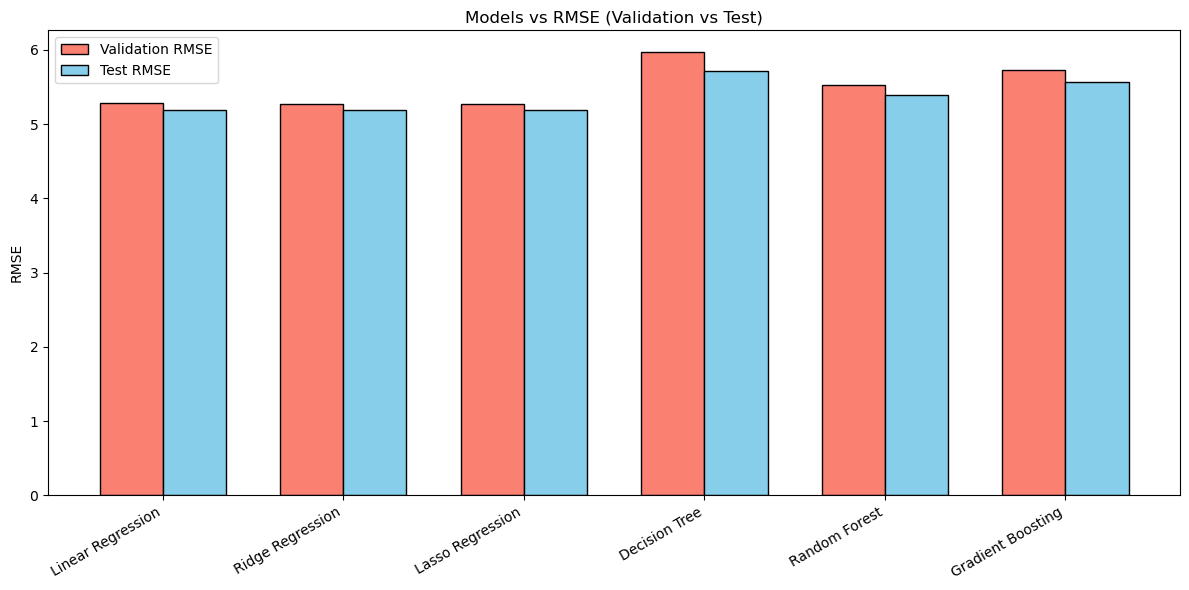

In [35]:
# ------------------------
# 12️⃣ Visualization: Models vs RMSE (Validation & Test)
# ------------------------
import matplotlib.pyplot as plt

# Extract Validation RMSE (already stored in results)
models_list = list(results.keys())
val_rmse_scores = [results[m]["RMSE"] for m in models_list]

# Extract Test RMSE
test_rmse_scores = []
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_rmse_scores.append(rmse_test)

# Plot side-by-side bars (Validation vs Test RMSE)
x = np.arange(len(models_list))  # model positions
width = 0.35  # bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, val_rmse_scores, width, label="Validation RMSE", color="salmon", edgecolor="black")
plt.bar(x + width/2, test_rmse_scores, width, label="Test RMSE", color="skyblue", edgecolor="black")

plt.xticks(x, models_list, rotation=30, ha="right")
plt.ylabel("RMSE")
plt.title("Models vs RMSE (Validation vs Test)")
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
#import pickle

In [37]:


# Save model
# with open("energy_model.pkl", "wb") as f:
#     pickle.dump(model, f)

# print("Model saved as energy_model.pkl")

In [38]:
import joblib

In [39]:
joblib.dump(model, "energy_model.pkl")

print("✅ Model saved as energy_model.pkl")

✅ Model saved as energy_model.pkl
